In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [94]:
cars = pd.read_csv(r"C:\Users\DIVYA\Downloads\Cars (2).csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [96]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [98]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [100]:
cars.duplicated

<bound method DataFrame.duplicated of      HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
..  ...        ...  ...         ...        ...
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615

[81 rows x 5 columns]>

In [102]:
cars.shape

(81, 5)

<Axes: xlabel='HP', ylabel='Density'>

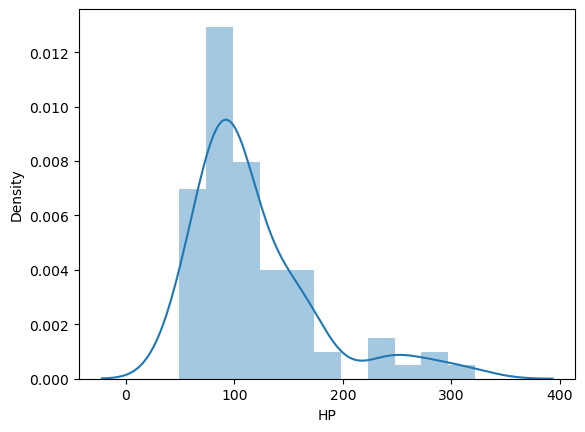

In [104]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(cars['HP'])

<Axes: xlabel='HP', ylabel='MPG'>

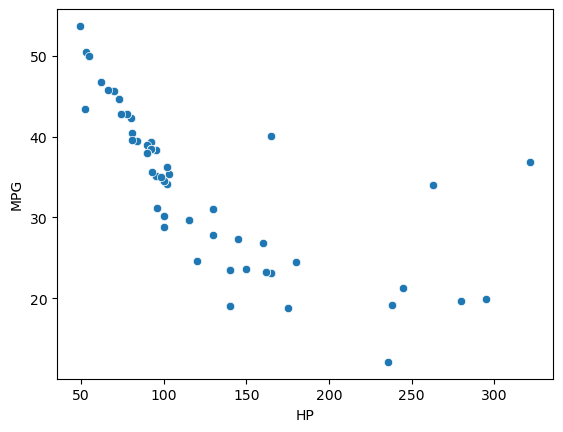

In [106]:
sns.scatterplot(x=cars['HP'],y=cars['MPG'])

<Axes: xlabel='HP', ylabel='MPG'>

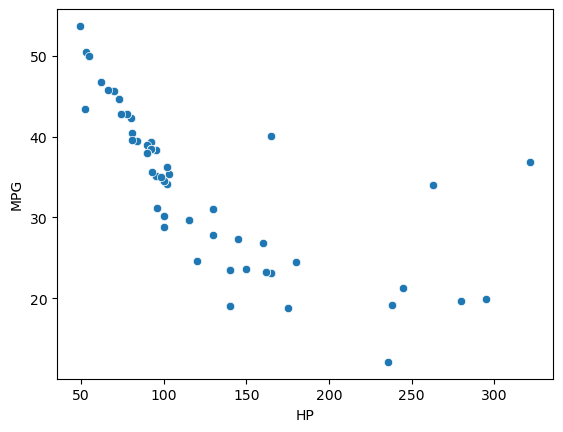

In [108]:
sns.scatterplot(x=cars['HP'],y=cars['MPG'])


Correlation Matrix

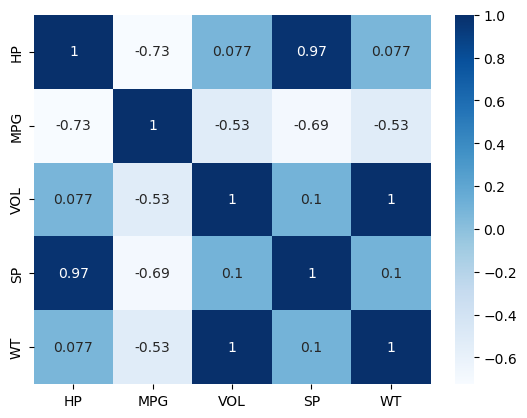

In [129]:
sns.heatmap(cars.corr(),cmap='Blues',annot=True)
plt.show()

In [111]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [113]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [115]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cars[['HP','MPG','VOL','SP']]=sc.fit_transform(cars[['HP','MPG','VOL','SP']])

In [119]:
cars

,HP,MPG,VOL,SP,WT
0,-1.206295,2.124387,-0.440611,-1.231403,28.762059
1,-1.100587,1.718071,-0.305252,-1.140871,30.466833
2,-1.100587,1.718071,-0.305252,-1.140871,30.193597
3,-0.836315,1.242355,-0.305252,-0.573239,30.632114
4,-1.135823,1.772157,-0.305252,-1.211826,29.889149
...,...,...,...,...,...
76,3.603442,0.273052,-2.200268,3.409929,16.132947
77,2.123523,-1.677614,0.732494,2.060245,37.923113
78,2.563975,-0.046510,-2.200268,2.132755,15.769625
79,3.127754,-1.607548,0.912972,3.292567,39.423099


In [127]:
import statsmodels.formula.api as smf
ml_vol=smf.ols('MPG~VOL',data = cars).fit()
np.round(ml_vol.rsquared,2)

0.28